#　Working With Missing And Duplicate Data
### About
In this lesson, we'll explore each of these options in detail and learn when to use them. We'll work with the 2015, 2016, and 2017 World Happiness Reports again - more specifically, we'll combine them and clean missing values as we start to define a more complete data cleaning workflow. You can find the data sets [here](https://www.kaggle.com/unsdsn/world-happiness#2015.csv), along with descriptions of each of the columns.

Missing or duplicate data may exist in a data set for a number of different reasons. Sometimes, missing or duplicate data is introduced as we perform cleaning and transformation tasks such as:

- Combining data
- Reindexing data
- Reshaping data

### Goal
In the Pandas Fundamentals course, we learned that there are various ways to handle missing data:

- Remove any rows that have missing values.
- Remove any columns that have missing values.
- Fill the missing values with some other value.
- Leave the missing values as is.

In this lesson, we'll explore each of these options in detail and learn when to use them. We'll work with the 2015, 2016, and 2017 World Happiness Reports again - more specifically, we'll combine them and clean missing values as we start to define a more complete data cleaning workflow. You can find the data sets here, along with descriptions of each of the columns.

### Dataset
In this lesson, we'll explore each of these options in detail and learn when to use them. We'll work with the 2015, 2016, and 2017 World Happiness Reports again - more specifically, we'll combine them and clean missing values as we start to define a more complete data cleaning workflow. You can find the data sets [here](https://www.kaggle.com/unsdsn/world-happiness#2015.csv), along with descriptions of each of the columns.

In this lesson, we'll work with modified versions of the data sets. Each data set has already been updated so that each contains the same countries. For example, if a country appeared in the original 2015 report, but not in the original 2016 report, a row may filled with NaN.

- `Country` — name of the country
- `Region` — name of the region the country belongs to
- `Happiness Rank` — the rank of the country, as determined by its happiness score
- `Happiness Score` — a score assigned to each country based on the answers to a poll question that asks respondents to rate their happiness on a scale of 0-10
- `Family` — the estimated extent to which family contributes to the happiness score
- `Freedom` — the estimated extent to which freedom contributes to the happiness score
- `Generosity` — the estimated extent to which generosity contributes to the happiness score
- `Dystopia Residual`- Represents the extent to which the factors above over or under explain the happiness score. Don't worry too much about this column  you won't need in depth knowledge of it to complete this lesson.

### 1. Introduction
### 2. Identifying Missing Values
Let's confirm the number of missing values in happiness2016 and happiness2017 next.
- Use the DataFrame.isnull() and DataFrame.sum() methods to confirm the number of missing values in happiness2016. Assign the result to missing_2016.
- Use the DataFrame.isnull() and DataFrame.sum() methods to confirm the number of missing values in happiness2017. Assign the result to missing_2017.

In [1]:
import pandas as pd
happiness2015=pd.read_csv('wh_2015.csv')
happiness2016=pd.read_csv('wh_2016.csv')
happiness2017=pd.read_csv('wh_2017.csv')
missing_2015=happiness2015.isnull().sum()
missing_2016=happiness2016.isnull().sum()
missing_2017=happiness2017.isnull().sum()
# missing values in all columns except for Country and Year


### 3. Correcting Data Cleaning Errors that Result in Missing Values
In the previous exercise, you should've confirmed that happiness2016 and happiness2017 also contain missing values in all columns except for Country and Year. It's good to check for missing values before transforming data to make sure we don't unintentionally introduce missing values.

If we do introduce missing values after transforming data, we'll have to determine if the data is really missing or if it's the result of some kind of error. As we progress through this lesson, we'll use the following workflow to clean our missing values, starting with checking for errors:

1. Check for errors in data cleaning/transformation.
2. Use data from additional sources to fill missing values.
3. Drop row/column.
4. Fill missing values with reasonable estimates computed from the available data.

Instrunctions
1. Update the columns names for happiness2015, happiness2016 and happiness2017 to match the formatting of following criteria:
   - All letters should be uppercase.
   - There should be only one space between words.
   - There should be no parentheses in column names
2. Use pd.concat() to combine and reindex happiness2015, happiness2016 and happiness2017. Assign the result to combined.
3. Check for missing values. Assign the result to a variable named missing.

In [2]:
happiness2017.columns = happiness2017.columns.str.replace('.', ' ').str.replace('\s+', ' ').str.strip().str.upper()
happiness2015.columns = happiness2015.columns.str.replace('(', '').str.replace(')', '').str.strip().str.upper()
happiness2016.columns = happiness2016.columns.str.replace('(', '').str.replace(')', '').str.strip().str.upper()
combined=pd.concat([happiness2015, happiness2016, happiness2017],ignore_index=True)
missing=combined.isnull().sum()

C:\Users\eyuya\AppData\Local\Temp\ipykernel_46640\286386761.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  happiness2017.columns = happiness2017.columns.str.replace('.', ' ').str.replace('\s+', ' ').str.strip().str.upper()
C:\Users\eyuya\AppData\Local\Temp\ipykernel_46640\286386761.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  happiness2017.columns = happiness2017.columns.str.replace('.', ' ').str.replace('\s+', ' ').str.strip().str.upper()
C:\Users\eyuya\AppData\Local\Temp\ipykernel_46640\286386761.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  happiness2015.columns = happiness2015.columns.str.replace('(', '')

### Visualizing Missing Data
We can learn more about where these missing values are located by visualizing them with a heatmap, a graphical representation of our data in which values are represented as colors. We'll use the seaborn library to create the heatmap.

Note below that we first reset the index to be the YEAR column so that we'll be able to see the corresponding year on the left side of the heatmap. We can make the following observations:
- No values are missing in the COUNTRY column.
- There are some rows in the 2015, 2016, and 2017 data with missing values in all columns EXCEPT the COUNTRY column.
- Some columns only have data populated for one year.
- It looks like the REGION data is missing for the year 2017.
- Let's check that the last statement is correct in the next exercise.

Instructions

1. Confirm that the REGION column is missing from the 2017 data. Recall that there are 164 rows for the year 2017.
   - Select just the rows in combined in which the YEAR column equals 2017. Then, select just the REGION column. Assign the result to regions_2017.
   - Use the Series.isnull() and Series.sum() to calculate the total number of missing values in regions_2017, the REGION column for 2017. - Assign the result to missing.
2. Use the variable inspector to view the results of missing. Are all 164 region values missing for the year 2017?

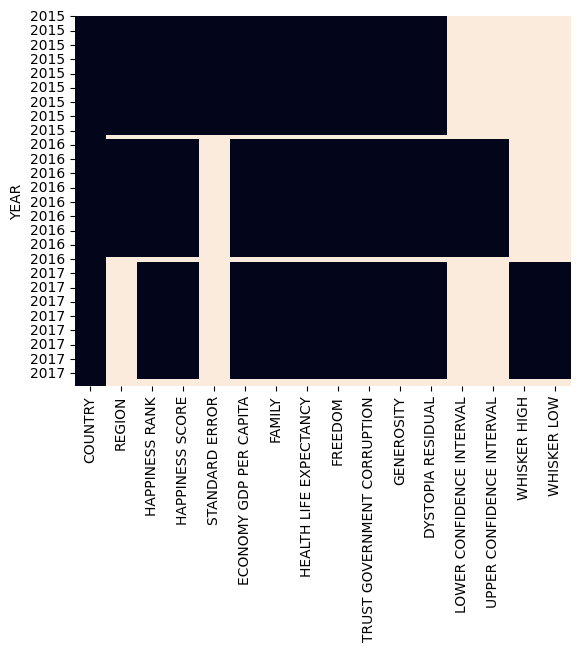

In [3]:
import seaborn as sns
combined_updated = combined.set_index('YEAR')
sns.heatmap(combined_updated.isnull(), cbar=False)
regions_2017=combined[combined['YEAR']==2017]['REGION']
missing=regions_2017.isnull().sum()

### 5. Using Data From Additional Sources to Fill in Missing Values
Before we drop or replace any values, let's first see if there's a way we can use other available data to correct the values.

- Check for errors in data cleaning/transformation.
- Use data from additional sources to fill missing values.
- Drop row/column.
- Fill missing values with reasonable estimates computed from the available data.

Recall once more that each year contains the same countries. Since the regions are fixed values - the region a country was assigned to in 2015 or 2016 won't change - we should be able to assign the 2015 or 2016 region to the 2017 row.

In order to do so, we'll use the following strategy:

- Create a dataframe containing all of the countries and corresponding regions from the happiness2015, happiness2016, and happiness2017 dataframes.
- Use the pd.merge() function to assign the REGION in the dataframe above to the corresponding country in combined.

The result will have two region columns - the original column with missing values will be named REGION_x. The updated column without missing values will be named REGION_y. We'll drop REGION_x to eliminate confusion.
Note that there are other ways to complete this task. We encourage you to explore them on your own.

1. Use the pd.merge() function to assign the REGION in the regions dataframe to the corresponding country in combined.
2. Use the DataFrame.drop() method to drop the original region column with missing values, now named REGION_x.
3. Use the DataFrame.isnull() and DataFrame.sum() methods to check for missing values. Assign the result to a variable named missing.

In [4]:
regions = pd.concat([happiness2015[['COUNTRY', 'REGION']], happiness2016[['COUNTRY', 'REGION']]]).drop_duplicates().dropna().reset_index(drop = True)
# Lecture didn't provide regions and you have to filter yourself

combined = pd.merge(left=combined, right=regions, on='COUNTRY', how='left')
combined = combined.drop('REGION_x', axis = 1)
missing = combined.isnull().sum()
print(combined)

               COUNTRY  HAPPINESS RANK  HAPPINESS SCORE  STANDARD ERROR  \
0          Switzerland             1.0            7.587         0.03411   
1              Iceland             2.0            7.561         0.04884   
2              Denmark             3.0            7.527         0.03328   
3               Norway             4.0            7.522         0.03880   
4               Canada             5.0            7.427         0.03553   
..                 ...             ...              ...             ...   
487        Puerto Rico             NaN              NaN             NaN   
488  Somaliland Region             NaN              NaN             NaN   
489  Somaliland region             NaN              NaN             NaN   
490           Suriname             NaN              NaN             NaN   
491          Swaziland             NaN              NaN             NaN   

     ECONOMY GDP PER CAPITA   FAMILY  HEALTH LIFE EXPECTANCY  FREEDOM  \
0                   1.3965

### 6. Identifying Duplicates Values
We'll use the DataFrame.duplicated() method to check for duplicate values. If no parameters are specified, the method will check for any rows in which all columns have the same values.

Instructions
1. Standardize the capitalization so that all the values in the COUNTRY column in combined are uppercase.
As an example, 'India' should be changed to 'INDIA'.
2. Use the df.duplicated() method to identify any rows that have the same value in the COUNTRY and YEAR columns. Assign your result to dups.
3. Use dups to index combined. Print the results.

In [5]:
combined['COUNTRY'] = combined['COUNTRY'].str.upper()
dups = combined.duplicated(['COUNTRY', 'YEAR'])
# a mask which idndicates duplicate rows
combined[~dups]
# a not duplicate mask

,COUNTRY,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,REGION_y
0,SWITZERLAND,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN,NaN,NaN,Western Europe
1,ICELAND,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN,NaN,NaN,Western Europe
2,DENMARK,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN,NaN,NaN,Western Europe
3,NORWAY,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN,NaN,NaN,NaN,Western Europe
4,CANADA,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN,NaN,NaN,NaN,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,OMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,Middle East and Northern Africa
487,PUERTO RICO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,Latin America and Caribbean
488,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,Sub-Saharan Africa
490,SURINAME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,Latin America and Caribbean


### 7. Correcting Duplicates Values
Instructions
1. Use the df.drop_duplicates() method to drop rows with more than one country for each year. Assign the result back to combined.
2. Pass a list containing the COUNTRY and YEAR columns into the drop_duplicates() method.

In [6]:
combined = combined.drop_duplicates(['COUNTRY', 'YEAR'])

### 8. Handle Missing Values by Dropping Columns
Next, we'll consider dropping columns with missing data:

- Check for errors in data cleaning/transformation.
- Use data from additional sources to fill missing values.
- Drop row/column.
- Fill missing values with reasonable estimates computed from the available data.

When deciding if you should drop a row or column, carefully consider whether you'll lose information that could alter your analysis. Instead of just saying, "If x percentage of the data is missing, we'll drop it.", it's better to also ask the following questions:
- Is the missing data needed to accomplish our end goal?
- How will removing or replacing the missing values affect our analysis?

Instructions
1. Use the df.drop() method to drop the columns in columns_to_drop.
2. Use the df.isnull() and df.sum() methods to calculate the number of missing values for each column. Assign the result to missing.



In [7]:
combined.isnull().sum()
# get null stats
columns_to_drop = ['LOWER CONFIDENCE INTERVAL', 'STANDARD ERROR', 'UPPER CONFIDENCE INTERVAL', 'WHISKER HIGH', 'WHISKER LOW']
# define a columns_to_drop list with over 60% null values (300 null values our of 489 rows)
combined=combined.drop(columns_to_drop,axis=1)
missing=combined.isnull().sum()


In [9]:
missing

COUNTRY                         0
HAPPINESS RANK                 19
HAPPINESS SCORE                19
ECONOMY GDP PER CAPITA         19
FAMILY                         19
HEALTH LIFE EXPECTANCY         19
FREEDOM                        19
TRUST GOVERNMENT CORRUPTION    19
GENEROSITY                     19
DYSTOPIA RESIDUAL              19
YEAR                            0
REGION_y                        0
dtype: int64

### 9. Handle Missing Values by Dropping Columns Continued
1. Use the df.dropna() method to drop all columns in combined with 159 or less non null values.
    - Set the thresh argument equal to 159 and the axis parameter equal to 1.
2. Use the df.isnull() and df.sum() methods to calcu

In [25]:
combined.isnull().sum().sort_values()
# find our 

COUNTRY                         0
YEAR                            0
REGION_y                        0
HAPPINESS RANK                 19
HAPPINESS SCORE                19
ECONOMY GDP PER CAPITA         19
FAMILY                         19
HEALTH LIFE EXPECTANCY         19
FREEDOM                        19
TRUST GOVERNMENT CORRUPTION    19
GENEROSITY                     19
DYSTOPIA RESIDUAL              19
dtype: int64

In [26]:
combined=combined.dropna(axis=1,thresh=159)
# keep row/column with at least 159 and abvoe non-null values
missing=combined.isnull().sum()
print(missing)
# no columns be drop

COUNTRY                         0
HAPPINESS RANK                 19
HAPPINESS SCORE                19
ECONOMY GDP PER CAPITA         19
FAMILY                         19
HEALTH LIFE EXPECTANCY         19
FREEDOM                        19
TRUST GOVERNMENT CORRUPTION    19
GENEROSITY                     19
DYSTOPIA RESIDUAL              19
YEAR                            0
REGION_y                        0
dtype: int64


### 10. Analyzing Missing Data
To make a decision about how to handle the rest of the missing data, we'll analyze if it's better to just drop the rows or replace the missing values with other values.

Let's return to the following questions:

1. Is the missing data needed to accomplish our end goal?
    - Yes, we need the data to accomplish our goal of analyzing happiness scores and contributing factors by region and year.
2. How will removing or replacing the missing values affect our analysis?
    - Let's break the second question down into a couple more specific questions:

3. What percentage of the data is missing?
    - Will dropping missing values cause us to lose valuable information in other columns?
4. Can we identify any patterns in the missing data?
Question: What percentage of the data is missing

As we saw when looking at the results of combined.isnull().sum() above, if missing values exist in a column of our dataframe, they account for about 4 percent of the total values (19 missing out of 489 values per column).

Generally speaking, the lower the percentage of missing values, the less likely dropping them will significantly impact the analysis.

Question: Will dropping missing values cause us to lose valuable information in other columns?

### 11. Handling Missing Values with Imputation
